# This script has problems, it cannot accurately calculate water balance!!!
# Debug needed!!!

In [48]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import ticker
import datetime as dt
import netCDF4 as nc

In [49]:
famb = "/short/w35/mm3972/cable/runs/EucFACE/EucFACE_jim_dushan/outputs/EucFACE_amb_out.nc"
fele = "/short/w35/mm3972/cable/runs/EucFACE/EucFACE_jim_dushan/outputs/EucFACE_ele_out.nc"
#famb = "/short/w35/mm3972/cable/runs/EucFACE/EucFACE_run/outputs/gw_on/EucFACE_amb_out.nc"
#fele = "/short/w35/mm3972/cable/runs/EucFACE/EucFACE_run/outputs/gw_on/EucFACE_ele_out.nc"

In [50]:
amb = nc.Dataset(famb, 'r')
ele = nc.Dataset(fele, 'r')

In [51]:
step_2_sec = 30.*60.

In [52]:
df_amb              = pd.DataFrame(amb.variables['Rainf'][:,0], columns=['Rainf']) # 'Rainfall+snowfall'
df_amb['Evap']      = amb.variables['Evap'][:,0]   # 'Total evaporation'
df_amb['TVeg']      = amb.variables['TVeg'][:,0]   # 'Vegetation transpiration'
df_amb['ESoil']     = amb.variables['ESoil'][:,0]  # 'evaporation from soil'
df_amb['ECanop']    = amb.variables['ECanop'][:,0] # 'Wet canopy evaporation'
df_amb['Qs']        = amb.variables['Qs'][:,0]     # 'Surface runoff'
df_amb['Qsb']       = amb.variables['Qsb'][:,0]    # 'Subsurface runoff'
df_amb['Qrecharge'] = amb.variables['Qrecharge'][:,0] 
df_amb['dates']     = nc.num2date(amb.variables['time'][:],amb.variables['time'].units)
df_amb              = df_amb.set_index('dates')
df_amb.head()*step_2_sec

,Rainf,Evap,TVeg,ESoil,ECanop,Qs,Qsb,Qrecharge
dates,,,,,,,,
2013-01-01 00:30:00,0.0,0.002354,0.000934,0.001421,0.0,0.0,0.0,0.0
2013-01-01 01:00:00,0.0,0.002518,0.000901,0.001617,0.0,0.0,0.0,0.0
2013-01-01 01:30:00,0.0,0.003148,0.000893,0.002256,0.0,0.0,0.0,0.0
2013-01-01 02:00:00,0.0,0.002281,0.000836,0.001444,0.0,0.0,0.0,0.0
2013-01-01 02:30:00,0.0,0.002273,0.000809,0.001464,0.0,0.0,0.0,0.0


In [53]:
df_ele              = pd.DataFrame(ele.variables['Rainf'][:,0], columns=['Rainf']) # 'Rainfall+snowfall'
df_ele['Evap']      = ele.variables['Evap'][:,0]   # 'Total evaporation'
df_ele['TVeg']      = ele.variables['TVeg'][:,0]   # 'Vegetation transpiration'
df_ele['ESoil']     = ele.variables['ESoil'][:,0]  # 'evaporation from soil'
df_ele['ECanop']    = ele.variables['ECanop'][:,0] # 'Wet canopy evaporation'
df_ele['Qs']        = ele.variables['Qs'][:,0]     # 'Surface runoff'
df_ele['Qsb']       = ele.variables['Qsb'][:,0]    # 'Subsurface runoff'
df_ele['Qrecharge'] = ele.variables['Qrecharge'][:,0] 
df_ele['dates']     = nc.num2date(ele.variables['time'][:],ele.variables['time'].units)
df_ele              = df_ele.set_index('dates')
df_ele.head()*step_2_sec

,Rainf,Evap,TVeg,ESoil,ECanop,Qs,Qsb,Qrecharge
dates,,,,,,,,
2013-01-01 00:30:00,0.0,0.002382,0.000933,0.001448,0.0,0.0,0.0,0.0
2013-01-01 01:00:00,0.0,0.002548,0.000901,0.001647,0.0,0.0,0.0,0.0
2013-01-01 01:30:00,0.0,0.003188,0.000893,0.002296,0.0,0.0,0.0,0.0
2013-01-01 02:00:00,0.0,0.002305,0.000836,0.001469,0.0,0.0,0.0,0.0
2013-01-01 02:30:00,0.0,0.002297,0.000808,0.001488,0.0,0.0,0.0,0.0


In [37]:
df_amb              = df_amb*step_2_sec
df_amb              = df_amb.resample("M").agg('sum')
df_amb              = df_amb.drop(df_amb.index[len(df_amb)-1])
df_amb.index        = df_amb.index.strftime('%Y-%m-%d')
#turn DatetimeIndex into the formatted strings specified by date_format

df_ele              = df_ele*step_2_sec
df_ele              = df_ele.resample("M").agg('sum')
df_ele              = df_ele.drop(df_ele.index[len(df_ele)-1])
df_ele.index        = df_ele.index.strftime('%Y-%m-%d')
#turn DatetimeIndex into the formatted strings specified by date_format

In [39]:
df_amb['Season']    = np.zeros(len(df_amb))
df_amb['Year']      = np.zeros(len(df_amb))
df_ele['Season']    = np.zeros(len(df_ele))
df_ele['Year']      = np.zeros(len(df_ele))
for i in np.arange(0,len(df_amb),1):
    df_amb['Year'][i] = df_amb.index[i][0:4]
    df_ele['Year'][i] = df_ele.index[i][0:4]
    if df_amb.index[i][5:7] in ['01','02','12']:
        df_amb['Season'][i] = 1
        df_ele['Season'][i] = 1
    elif df_amb.index[i][5:7] in ['03','04','05']:
        df_amb['Season'][i] = 2
        df_ele['Season'][i] = 2
    elif df_amb.index[i][5:7] in ['06','07','08']:
        df_amb['Season'][i] = 3
        df_ele['Season'][i] = 3
    elif df_amb.index[i][5:7] in ['09','10','11']:
        df_amb['Season'][i] = 4
        df_ele['Season'][i] = 4

df_amb['Year'][0:-1] = df_amb['Year'][1:]
df_ele['Year'][0:-1] = df_ele['Year'][1:]

/short/w35/mm3972/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/short/w35/mm3972/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/short/w35/mm3972/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/short/w35/mm3972/anaconda3/env

In [40]:
df_amb = df_amb.groupby(by=['Year','Season']).sum()
df_ele = df_ele.groupby(by=['Year','Season']).sum()

In [41]:
df_amb

Rainf        Evap        TVeg       ESoil     ECanop  \
Year   Season                                                              
2013.0 1.0     366.000000  218.243042   74.209259  131.609543  12.424252   
       2.0     160.199997  216.851181  107.498077   99.143120  10.209986   
       3.0      86.199997  123.783920   53.171360   63.219318   7.393245   
       4.0     243.199997  205.317093   84.682816  112.478539   8.155741   
2014.0 1.0     100.599998  193.078232  120.967018   59.184559  12.926660   
       2.0     138.800003  190.544464   99.522896   78.131828  12.889729   
       3.0     128.800003  133.174438   52.010387   68.801064  12.362984   
       4.0     102.599998  129.673538   54.792957   68.567276   6.313304   
2015.0 1.0     439.399994  385.363922  130.620270  235.813354  18.930292   
       2.0     409.400024  252.153259   73.638351  158.072571  20.442329   
       3.0     107.199997  149.262634   51.892361   90.381653   6.988616   
       4.0     205.400009  215.287460   96.632057  108.000443  10.654968   
2016.0 1.0     499.200012  443.852173  210.991867  209.596008  23.264303   
       2.0      37.599998  154.869827  113.074295   35.518063   6.277463   
       3.0     331.200012  210.025055   62.624947  133.071335  14.328773   
       4.0      94.400002  187.477402  110.765503   69.213196   7.498709   

                         Qs  Qsb  Qrecharge  
Year   Season                                
2013.0 1.0     1.160067e+01  0.0        0.0  
       2.0     5.401913e-07  0.0        0.0  
       3.0     0.000000e+00  0.0        0.0  
       4.0     1.035407e-06  0.0        0.0  
2014.0 1.0     0.000000e+00  0.0        0.0  
       2.0     5.921157e-07  0.0        0.0  
       3.0     2.725191e-07  0.0        0.0  
       4.0     3.960066e-07  0.0        0.0  
2015.0 1.0     2.688874e-06  0.0        0.0  
       2.0     1.263050e+01  0.0        0.0  
       3.0     2.964141e-07  0.0        0.0  
       4.0     1.268845e-06  0.0        0.0  
2016.0 1.0     5.734730e+00  0.0        0.0  
       2.0     0.000000e+00  0.0        0.0  
       3.0     1.132824e+01  0.0        0.0  
       4.0     8.815343e-08  0.0        0.0

In [42]:
df_ele

Rainf        Evap        TVeg       ESoil     ECanop  \
Year   Season                                                              
2013.0 1.0     366.000000  219.919067   73.668129  133.845581  12.405357   
       2.0     160.199997  209.890686   95.245071  104.458725  10.186893   
       3.0      86.199997  123.309654   48.439713   67.489937   7.380004   
       4.0     243.199997  205.472794   83.417496  113.921989   8.133305   
2014.0 1.0     100.599998  199.642456  126.535110   60.192570  12.914782   
       2.0     138.800003  191.035675   98.596397   79.567177  12.872092   
       3.0     128.800003  136.668304   55.039444   69.275856  12.353010   
       4.0     102.599998  155.335999   80.870308   68.149490   6.316189   
2015.0 1.0     439.399994  378.364014  119.019981  240.437805  18.906239   
       2.0     409.400024  252.389679   69.966011  162.011429  20.412226   
       3.0     107.199997  145.120895   44.107994   94.034874   6.978022   
       4.0     205.400009  208.578751   87.412628  110.527283  10.638828   
2016.0 1.0     499.200012  439.324280  199.598480  216.517578  23.208223   
       2.0      37.599998  149.217819  106.823845   36.117821   6.276157   
       3.0     331.200012  207.265564   54.456436  138.499573  14.309545   
       4.0      94.400002  186.280823  106.959198   71.831070   7.490560   

                         Qs  Qsb  Qrecharge  
Year   Season                                
2013.0 1.0     1.171684e+01  0.0        0.0  
       2.0     3.272143e-07  0.0        0.0  
       3.0     2.639846e-08  0.0        0.0  
       4.0     1.063313e-06  0.0        0.0  
2014.0 1.0     0.000000e+00  0.0        0.0  
       2.0     5.592082e-07  0.0        0.0  
       3.0     6.255171e-08  0.0        0.0  
       4.0     9.748116e-08  0.0        0.0  
2015.0 1.0     2.422911e-06  0.0        0.0  
       2.0     1.284178e+01  0.0        0.0  
       3.0     3.601423e-07  0.0        0.0  
       4.0     1.020415e-06  0.0        0.0  
2016.0 1.0     6.549534e+00  0.0        0.0  
       2.0     0.000000e+00  0.0        0.0  
       3.0     1.153684e+01  0.0        0.0  
       4.0     1.637458e-07  0.0        0.0

# Soil Moisture 6 layers

In [ ]:
# For 6 layers
df_SM_amb              = pd.DataFrame(amb.variables['SoilMoist'][:,0,0], columns=['SoilMoist']) 
df_SM_amb['SoilMoist'] =   amb.variables['SoilMoist'][:,0,0]*22.  \
                     + amb.variables['SoilMoist'][:,1,0]*58.  \
                     + amb.variables['SoilMoist'][:,2,0]*154. \
                     + amb.variables['SoilMoist'][:,3,0]*409. \
                     + amb.variables['SoilMoist'][:,4,0]*1085.\
                     + amb.variables['SoilMoist'][:,5,0]*2872. 
df_SM_amb['SoilMoist_up'] = amb.variables['SoilMoist'][:,0,0]*22.  \
                      + amb.variables['SoilMoist'][:,1,0]*58.  \
                      + amb.variables['SoilMoist'][:,2,0]*154. 
df_SM_amb['SoilMoist_lw'] = amb.variables['SoilMoist'][:,3,0]*409. \
                      + amb.variables['SoilMoist'][:,4,0]*1085.\
                      + amb.variables['SoilMoist'][:,5,0]*2872. 
df_SM_amb['dates']    = nc.num2date(amb.variables['time'][:],amb.variables['time'].units)
df_SM_amb             = df_SM_amb.set_index('dates')
df_SM_index_amb       = df_SM_amb.index.strftime('%Y-%m-%d %H:%M')

df_SM_ele              = pd.DataFrame(ele.variables['SoilMoist'][:,0,0], columns=['SoilMoist']) 
df_SM_ele['SoilMoist'] =   ele.variables['SoilMoist'][:,0,0]*22.  \
                     + ele.variables['SoilMoist'][:,1,0]*58.  \
                     + ele.variables['SoilMoist'][:,2,0]*154. \
                     + ele.variables['SoilMoist'][:,3,0]*409. \
                     + ele.variables['SoilMoist'][:,4,0]*1085.\
                     + ele.variables['SoilMoist'][:,5,0]*2872. 
df_SM_ele['SoilMoist_up'] = ele.variables['SoilMoist'][:,0,0]*22.  \
                      + ele.variables['SoilMoist'][:,1,0]*58.  \
                      + ele.variables['SoilMoist'][:,2,0]*154. 
df_SM_ele['SoilMoist_lw'] = ele.variables['SoilMoist'][:,3,0]*409. \
                      + ele.variables['SoilMoist'][:,4,0]*1085.\
                      + ele.variables['SoilMoist'][:,5,0]*2872. 
df_SM_ele['dates']    = nc.num2date(ele.variables['time'][:],ele.variables['time'].units)
df_SM_ele             = df_SM_ele.set_index('dates')
df_SM_index_ele       = df_SM_ele.index.strftime('%Y-%m-%d %H:%M')


In [ ]:
# daily soil water content and daily changes
df_SM_laststep_amb         = df_SM_amb.resample("D").agg('mean')
df_SM_laststep_amb.iloc[0] = df_SM_amb.iloc[0]
j = 1
for i in np.arange(0,len(df_SM_amb),1):
    if df_SM_index_amb[i][11:16] == '00:00':
        df_SM_amb.iloc[i]
        df_SM_laststep_amb.iloc[j] = df_SM_amb.iloc[i]
        j       += 1
        
df_SM_chg_amb = pd.DataFrame((df_SM_laststep_amb.iloc[1:].values - df_SM_laststep_amb.iloc[0:-1].values), \
                          columns=['SoilMoist','SoilMoist_up','SoilMoist_lw']) 
df_SM_chg_amb['dates'] = df_SM_laststep_amb.index[0:-1]
df_SM_chg_amb          = df_SM_chg_amb.set_index('dates')

df_SM_laststep_ele         = df_SM_ele.resample("D").agg('mean')
df_SM_laststep_ele.iloc[0] = df_SM_ele.iloc[0]
j = 1
for i in np.arange(0,len(df_SM_ele),1):
    if df_SM_index_ele[i][11:16] == '00:00':
        df_SM_ele.iloc[i]
        df_SM_laststep_ele.iloc[j] = df_SM_ele.iloc[i]
        j       += 1
        
df_SM_chg_ele = pd.DataFrame((df_SM_laststep_ele.iloc[1:].values - df_SM_laststep_ele.iloc[0:-1].values), \
                          columns=['SoilMoist','SoilMoist_up','SoilMoist_lw']) 
df_SM_chg_ele['dates'] = df_SM_laststep_ele.index[0:-1]
df_SM_chg_ele          = df_SM_chg_ele.set_index('dates')

In [57]:
# monthly soil water content and monthly changes
df_SM_mth_laststep_amb         = df_SM_amb.resample("M").agg('mean')
df_SM_mth_laststep_amb.iloc[0] = df_SM_amb.iloc[0]
j = 1
for i in np.arange(0,len(df_SM_amb),1):
    if df_SM_amb.index.is_month_start[i] and df_SM_index_amb[i][11:16] == '00:00':
        df_SM_mth_laststep_amb.iloc[j] = df_SM_amb.iloc[i]
        j       += 1
df_SM_mth_chg_amb = pd.DataFrame((df_SM_mth_laststep_amb.iloc[1:].values - df_SM_mth_laststep_amb.iloc[0:-1].values), \
                          columns=['SoilMoist','SoilMoist_up','SoilMoist_lw']) 
df_SM_mth_chg_amb['dates'] = df_SM_mth_laststep_amb.index[0:-1]
df_SM_mth_chg_amb          = df_SM_mth_chg_amb.set_index('dates')

# monthly soil water content and monthly changes
df_SM_mth_laststep_ele         = df_SM_ele.resample("M").agg('mean')
df_SM_mth_laststep_ele.iloc[0] = df_SM_ele.iloc[0]
j = 1
for i in np.arange(0,len(df_SM_ele),1):
    if df_SM_ele.index.is_month_start[i] and df_SM_index_ele[i][11:16] == '00:00':
        df_SM_mth_laststep_ele.iloc[j] = df_SM_ele.iloc[i]
        j       += 1
df_SM_mth_chg_ele = pd.DataFrame((df_SM_mth_laststep_ele.iloc[1:].values - df_SM_mth_laststep_ele.iloc[0:-1].values), \
                          columns=['SoilMoist','SoilMoist_up','SoilMoist_lw']) 
df_SM_mth_chg_ele['dates'] = df_SM_mth_laststep_ele.index[0:-1]
df_SM_mth_chg_ele          = df_SM_mth_chg_ele.set_index('dates')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

## Soil Moisture 13 layers

In [56]:
zse                    = [0.02, 0.05,0.06,0.13,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.75,1.50] 
df_SM_amb              = pd.DataFrame(amb.variables['SoilMoist'][:,0,0], columns=['SoilMoist']) 
df_SM_ele              = pd.DataFrame(ele.variables['SoilMoist'][:,0,0], columns=['SoilMoist']) 
df_SM_amb['SoilMoist'] = 0.0
df_SM_ele['SoilMoist'] = 0.0
ele.variables['SoilMoist'][:,2,0]
for i in np.arange(0,13,1):
    df_SM_amb = df_SM_amb + amb.variables['SoilMoist'][:,i,0]*zse[i]*1000.
    df_SM_ele = df_SM_ele + ele.variables['SoilMoist'][:,i,0]*zse[i]*1000.

df_SM_amb['dates']    = nc.num2date(amb.variables['time'][:],amb.variables['time'].units)
df_SM_amb             = df_SM_amb.set_index('dates')
df_SM_index_amb       = df_SM_amb.index.strftime('%Y-%m-%d %H:%M')

df_SM_ele['dates']    = nc.num2date(ele.variables['time'][:],ele.variables['time'].units)
df_SM_ele             = df_SM_ele.set_index('dates')
df_SM_index_ele       = df_SM_ele.index.strftime('%Y-%m-%d %H:%M')


IndexError: index exceeds dimension bounds

In [13]:
# daily soil water content and daily changes
df_SM_laststep_amb         = df_SM_amb.resample("D").agg('mean')
df_SM_laststep_amb.iloc[0] = df_SM_amb.iloc[0]
j = 1
for i in np.arange(0,len(df_SM_amb),1):
    if df_SM_index_amb[i][11:16] == '00:00':
        df_SM_amb.iloc[i]
        df_SM_laststep_amb.iloc[j] = df_SM_amb.iloc[i]
        j       += 1
        
df_SM_chg_amb = pd.DataFrame((df_SM_laststep_amb.iloc[1:].values - df_SM_laststep_amb.iloc[0:-1].values), \
                          columns=['SoilMoist'])#,'SoilMoist_up','SoilMoist_lw']) 
df_SM_chg_amb['dates'] = df_SM_laststep_amb.index[0:-1]
df_SM_chg_amb          = df_SM_chg_amb.set_index('dates')

df_SM_laststep_ele         = df_SM_ele.resample("D").agg('mean')
df_SM_laststep_ele.iloc[0] = df_SM_ele.iloc[0]
j = 1
for i in np.arange(0,len(df_SM_ele),1):
    if df_SM_index_ele[i][11:16] == '00:00':
        df_SM_ele.iloc[i]
        df_SM_laststep_ele.iloc[j] = df_SM_ele.iloc[i]
        j       += 1
        
df_SM_chg_ele = pd.DataFrame((df_SM_laststep_ele.iloc[1:].values - df_SM_laststep_ele.iloc[0:-1].values), \
                          columns=['SoilMoist'])#,'SoilMoist_up','SoilMoist_lw']) 
df_SM_chg_ele['dates'] = df_SM_laststep_ele.index[0:-1]
df_SM_chg_ele          = df_SM_chg_ele.set_index('dates')

In [14]:
# monthly soil water content and monthly changes
df_SM_mth_laststep_amb         = df_SM_amb.resample("M").agg('mean')
df_SM_mth_laststep_amb.iloc[0] = df_SM_amb.iloc[0]
j = 1
for i in np.arange(0,len(df_SM_amb),1):
    if df_SM_amb.index.is_month_start[i] and df_SM_index_amb[i][11:16] == '00:00':
        df_SM_mth_laststep_amb.iloc[j] = df_SM_amb.iloc[i]
        j       += 1
df_SM_mth_chg_amb = pd.DataFrame((df_SM_mth_laststep_amb.iloc[1:].values - df_SM_mth_laststep_amb.iloc[0:-1].values), \
                          columns=['SoilMoist'])#,'SoilMoist_up','SoilMoist_lw']) 
df_SM_mth_chg_amb['dates'] = df_SM_mth_laststep_amb.index[0:-1]
df_SM_mth_chg_amb          = df_SM_mth_chg_amb.set_index('dates')

# monthly soil water content and monthly changes
df_SM_mth_laststep_ele         = df_SM_ele.resample("M").agg('mean')
df_SM_mth_laststep_ele.iloc[0] = df_SM_ele.iloc[0]
j = 1
for i in np.arange(0,len(df_SM_ele),1):
    if df_SM_ele.index.is_month_start[i] and df_SM_index_ele[i][11:16] == '00:00':
        df_SM_mth_laststep_ele.iloc[j] = df_SM_ele.iloc[i]
        j       += 1
df_SM_mth_chg_ele = pd.DataFrame((df_SM_mth_laststep_ele.iloc[1:].values - df_SM_mth_laststep_ele.iloc[0:-1].values), \
                          columns=['SoilMoist'])#,'SoilMoist_up','SoilMoist_lw']) 
df_SM_mth_chg_ele['dates'] = df_SM_mth_laststep_ele.index[0:-1]
df_SM_mth_chg_ele          = df_SM_mth_chg_ele.set_index('dates')

## Plots

NameError: name 'men_means' is not defined

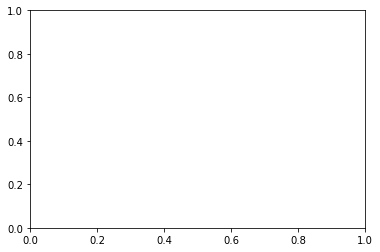

In [16]:
# bar plot

'TVeg','ESoil','ECanop',
'Qs','Qsb','Qrecharge'

labels = ['Rain','Evap','Runoff']
x = np.arange(len(labels))  # the label locations
width = 0.5                # the width of the bars

df_amb

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='amb')
rects2 = ax.bar(x + width/2, women_means, width, label='ele')


menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()





men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [157]:
"""
====================
Horizontal bar chart
====================

This example showcases a simple horizontal bar chart.
"""
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()